In [1]:
#Import libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.spatial import ConvexHull
from sklearn.metrics import silhouette_score, silhouette_samples

In [87]:
#Read data
t20_batting=pd.read_csv('D:\\Studies\\Bangalore\\Python\\datasets for project\\Cleaned dataset\\t20_batting_cleaned.csv')
t20_bowling=pd.read_csv('D:\\Studies\\Bangalore\\Python\\datasets for project\\Cleaned dataset\\t20_bowling_cleaned.csv')
t20_fielding=pd.read_csv('D:\\Studies\\Bangalore\\Python\\datasets for project\\Cleaned dataset\\t20_fieldling_cleaned.csv')

In [88]:
#Filter dataset
t20battingf=t20_batting[t20_batting['Inns']>=10]
t20bowlingf=t20_bowling[t20_bowling['Inns']>=10]
t20fieldingf=t20_fielding[t20_fielding['Inns']>=10]

In [89]:
#create new metrics for ranking
t20battingf['ConversionRate'] = (t20battingf['100'] + t20battingf['50']) / t20battingf['Inns']
t20battingf['DuckRate'] = (t20battingf['0'] / t20battingf['Inns']) * 100
t20bowlingf['W/Inn']=(t20bowlingf['Wkts']/t20bowlingf['Inns'])
t20bowlingf['Impactspells']=((t20bowlingf['4'] + t20bowlingf['5'])/t20bowlingf['Inns'])
t20bowlingf['bAve']=t20bowlingf['Ave']
t20bowlingf['bSR']=t20bowlingf['SR']
t20bowlingf=t20bowlingf.drop(columns=['SR'])
t20bowlingf=t20bowlingf.drop(columns=['Ave'])
t20fieldingf['St/Inn']=(t20fieldingf['St']/t20fieldingf['Inns'])
t20fieldingf['Ct/Inn']=(t20fieldingf['Ct']/t20fieldingf['Inns'])

C:\Users\91944\AppData\Local\Temp\ipykernel_10396\2022076922.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t20battingf['ConversionRate'] = (t20battingf['100'] + t20battingf['50']) / t20battingf['Inns']
C:\Users\91944\AppData\Local\Temp\ipykernel_10396\2022076922.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t20battingf['DuckRate'] = (t20battingf['0'] / t20battingf['Inns']) * 100
C:\Users\91944\AppData\Local\Temp\ipykernel_10396\2022076922.py:4: SettingWithCopyWarning: 
A value is trying to be se

In [5]:
#Perform Clustering for the datasets
#Batting
features_bat=['HS','Runs','Ave','SR','100','50','0']
batdata=t20battingf[features_bat]

C:\Users\91944\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\91944\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\91944\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\91944\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

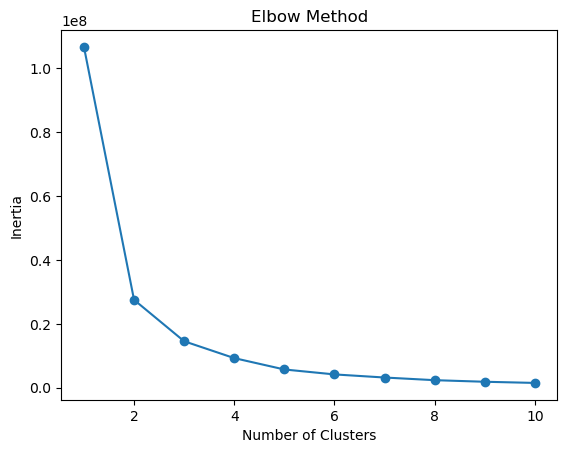

In [6]:
inertia = []
for k in range(1, 11):  # Test k from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(batdata)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [7]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(batdata)
batdata['Cluster'] = clusters

C:\Users\91944\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\91944\AppData\Local\Temp\ipykernel_10396\2034817660.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batdata['Cluster'] = clusters


In [8]:
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['HS', 'Runs', 'Ave', 'SR', '100', '50', '0'])
print(cluster_centers)


          HS         Runs        Ave          SR       100        50         0
0  45.997059   227.629412  18.026324  114.645618  0.017647  0.661765  1.658824
1  76.654762   767.488095  26.074524  125.085357  0.119048  3.726190  2.607143
2  96.533333  1668.155556  29.898444  131.484667  0.688889  8.911111  3.755556


C:\Users\91944\AppData\Local\Temp\ipykernel_10396\3441556445.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batdata['PCA1'] = pca_data[:, 0]
C:\Users\91944\AppData\Local\Temp\ipykernel_10396\3441556445.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batdata['PCA2'] = pca_data[:, 1]


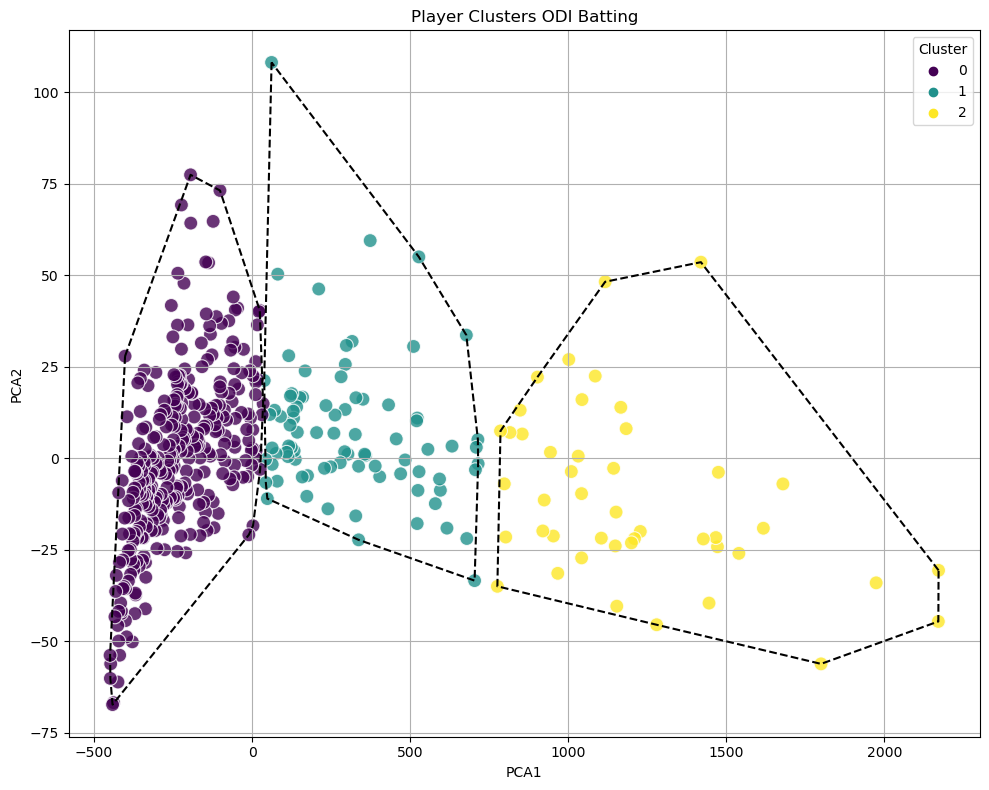

In [9]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(batdata)
batdata['PCA1'] = pca_data[:, 0]
batdata['PCA2'] = pca_data[:, 1]

# Plot clusters with convex hulls
plt.figure(figsize=(10, 8))
sns.scatterplot(data=batdata, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100, alpha=0.8)
plt.title('Player Clusters ODI Batting')

# Draw convex hulls for each cluster
for cluster_id in sorted(batdata['Cluster'].unique()):
    cluster_data = batdata[batdata['Cluster'] == cluster_id][['PCA1', 'PCA2']].values
    if len(cluster_data) > 2:  # ConvexHull requires at least 3 points
        hull = ConvexHull(cluster_data)
        hull_points = np.append(hull.vertices, hull.vertices[0])  # Close the hull
        plt.plot(cluster_data[hull_points, 0], cluster_data[hull_points, 1], linestyle='--', color='black')

# Final adjustments
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
#Evaluating the clusters
sil_score = silhouette_score(batdata.drop('Cluster', axis=1), clusters)
print(f"Silhouette Score for 3 clusters: {sil_score}")

Silhouette Score for 3 clusters: 0.6401975914602616


In [11]:
#Cluster Bowling data
featuresbowl=['bAve','Wkts','Econ','bSR','4','5','BBIwick','W/Inn']
bowldata=t20bowlingf[featuresbowl]

C:\Users\91944\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\91944\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\91944\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\91944\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

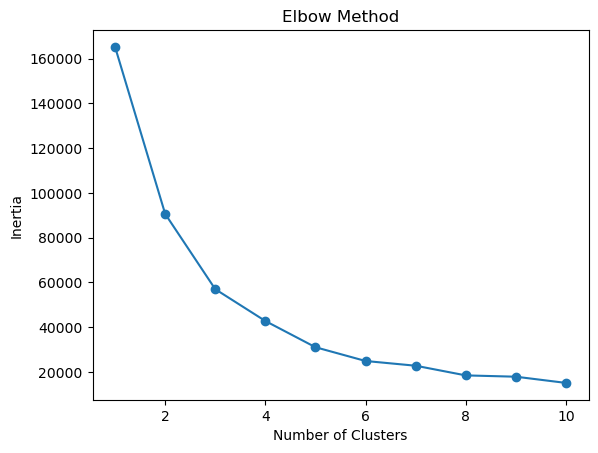

In [12]:
inertia = []
for k in range(1, 11):  # Test k from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(bowldata)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [13]:
kmeans = KMeans(n_clusters=3, random_state=42)
clustersbowl = kmeans.fit_predict(bowldata)
bowldata['Cluster'] = clustersbowl

C:\Users\91944\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\91944\AppData\Local\Temp\ipykernel_10396\1586474188.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bowldata['Cluster'] = clustersbowl


In [14]:
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['bAve','Wkts','Econ','bSR','4','5','BBIwick','W/Inn'])
print(cluster_centers)

        bAve       Wkts      Econ        bSR         4             5  \
0  21.766313  20.654378  7.295760  17.873272  0.336406  8.294931e-02   
1  38.829596   9.787879  7.954040  29.356566  0.060606 -8.326673e-17   
2  21.784032  53.758065  7.268548  17.919355  1.241935  3.064516e-01   

    BBIwick     W/Inn  
0  3.331797  1.108503  
1  2.212121  0.627217  
2  4.064516  1.197217  


C:\Users\91944\AppData\Local\Temp\ipykernel_10396\4232386093.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bowldata['PCA1'] = pca_data[:, 0]
C:\Users\91944\AppData\Local\Temp\ipykernel_10396\4232386093.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bowldata['PCA2'] = pca_data[:, 1]


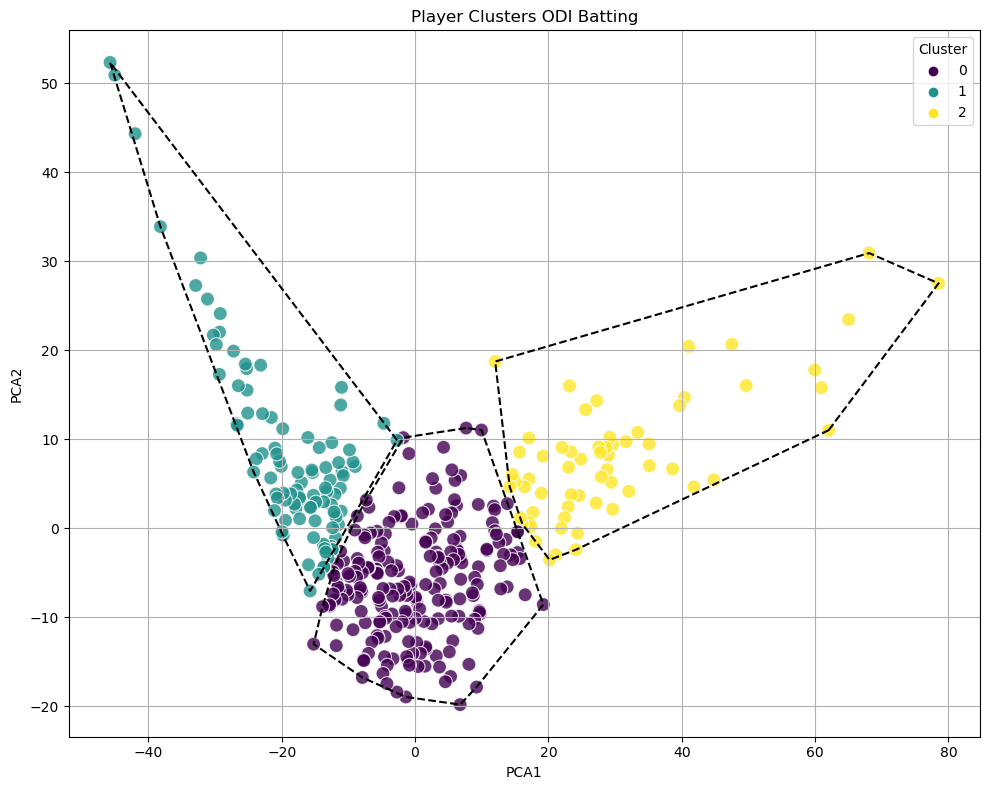

In [15]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(bowldata)
bowldata['PCA1'] = pca_data[:, 0]
bowldata['PCA2'] = pca_data[:, 1]

# Plot clusters with convex hulls
plt.figure(figsize=(10, 8))
sns.scatterplot(data=bowldata, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100, alpha=0.8)
plt.title('Player Clusters ODI Batting')

# Draw convex hulls for each cluster
for cluster_id in sorted(bowldata['Cluster'].unique()):
    cluster_data = bowldata[bowldata['Cluster'] == cluster_id][['PCA1', 'PCA2']].values
    if len(cluster_data) > 2:  # ConvexHull requires at least 3 points
        hull = ConvexHull(cluster_data)
        hull_points = np.append(hull.vertices, hull.vertices[0])  # Close the hull
        plt.plot(cluster_data[hull_points, 0], cluster_data[hull_points, 1], linestyle='--', color='black')

# Final adjustments
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
#Evaluating the clusters
sil_score_bowl = silhouette_score(bowldata.drop('Cluster', axis=1), clustersbowl)
print(f"Silhouette Score for 3 clusters: {sil_score_bowl}")

Silhouette Score for 3 clusters: 0.42208848849416936


In [91]:
#define metrics used to calculate the score
metrics=['Ave','SR','ConversionRate','DuckRate','W/Inn','bAve','bSR','Impactspells','Econ','D/I','St/Inn','Ct/Inn','Inns']
#Define the weights
#Define the weights
weights = {
    'Inns':0.2,
    'Ave': 0.3,
    'SR': 0.4,
    'ConversionRate': 0.1,
    'DuckRate': -0.1,  
    'W/Inn': 0.3,
    'Econ': -0.4, 
    'Impactspells': 0.3,
    'bAve':-0.4,
    'bSR':-0.4,
    'D/I': 0.5,
    'Ct/Inn':0.3,
    'St/Inn': 0.5
}

In [92]:
#calculate seperate for each batting bowling fielding
t20battingf['BattingScore'] = (
    weights['Inns']*t20battingf['Inns']+
    weights['Ave'] * t20battingf['Ave'] +
    weights['SR'] * t20battingf['SR'] +
    weights['ConversionRate'] * t20battingf['ConversionRate'] +
    weights['DuckRate'] * t20battingf['DuckRate']
)


C:\Users\91944\AppData\Local\Temp\ipykernel_10396\472356048.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t20battingf['BattingScore'] = (


In [93]:
t20bowlingf['BowlingScore'] = (
    weights['Inns']*t20bowlingf['Inns']+
    weights['W/Inn'] * t20bowlingf['W/Inn'] +
    weights['Econ'] * t20bowlingf['Econ'] +
    weights['Impactspells'] * t20bowlingf['Impactspells'] +
    weights['bSR'] * t20bowlingf['bSR'] +
    weights['bAve'] * t20bowlingf['bAve']
)

In [94]:
#using for wicketkeeper
t20fieldingf['FieldingScore'] = (
    weights['Ct/Inn'] * t20fieldingf['Ct/Inn'] +
    weights['St/Inn'] * t20fieldingf['St/Inn']
)

C:\Users\91944\AppData\Local\Temp\ipykernel_10396\3604703321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t20fieldingf['FieldingScore'] = (


In [95]:
#Assign a rank to the players based on scores
t20battingf['BatRank'] = t20battingf['BattingScore'].rank(ascending=False, method='dense').astype(int)
t20bowlingf['BowlRank'] = t20bowlingf['BowlingScore'].rank(ascending=False, method='dense').astype(int)
t20fieldingf['FRank'] = t20fieldingf['FieldingScore'].rank(ascending=False, method='dense').astype(int)

C:\Users\91944\AppData\Local\Temp\ipykernel_10396\1781901063.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t20battingf['BatRank'] = t20battingf['BattingScore'].rank(ascending=False, method='dense').astype(int)
C:\Users\91944\AppData\Local\Temp\ipykernel_10396\1781901063.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t20fieldingf['FRank'] = t20fieldingf['FieldingScore'].rank(ascending=False, method='dense').astype(int)


In [96]:
#Use Random forest to predict rank
#Define Features
features_batting = t20battingf[['Inns', 'Runs', 'Ave', 'SR', '100', '50', '4s', '6s', 'ConversionRate', 'DuckRate']]
target_batting = t20battingf['BatRank']

In [97]:
#Train test split
xtrain,xtest,ytrain,ytest=train_test_split(features_batting,target_batting,test_size=0.2,random_state=100)

In [98]:
#Fit the model
randomforestbat=RandomForestClassifier()
randomforestbat.fit(xtrain,ytrain)

RandomForestClassifier()

In [99]:
#Predicted Rank
t20battingf['Predicted_Rank']=randomforestbat.predict(features_batting)

C:\Users\91944\AppData\Local\Temp\ipykernel_10396\425773266.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t20battingf['Predicted_Rank']=randomforestbat.predict(features_batting)


In [100]:
t20battingf


,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,...,Startyear,Endyear,HSNotOut,Name,Country,ConversionRate,DuckRate,BattingScore,BatRank,Predicted_Rank
0,75,70.0,20.0,2633.0,94,52.66,1907.0,138.07,0.0,24.0,...,2010,2019,True,V Kohli,INDIA,0.342857,2.857143,84.774571,3,3
1,104,96.0,14.0,2633.0,118,32.10,1905.0,138.21,4.0,19.0,...,2007,2019,False,RG Sharma,INDIA,0.239583,6.250000,83.512958,5,5
2,83,80.0,7.0,2436.0,105,33.36,1810.0,134.58,2.0,15.0,...,2009,2019,False,MJ Guptill,NZ,0.212500,2.500000,79.611250,12,12
3,111,104.0,30.0,2263.0,75,30.58,1824.0,124.06,0.0,7.0,...,2006,2019,False,Shoaib Malik,ICC/PAK,0.067308,0.961538,79.508577,13,40
4,71,70.0,10.0,2140.0,123,35.66,1571.0,136.21,2.0,13.0,...,2005,2015,False,BB McCullum,NZ,0.214286,4.285714,78.774857,14,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,34,13.0,6.0,27.0,13,3.85,65.0,41.53,0.0,0.0,...,2010,2018,False,Shapoor Zadran,AFG,0.000000,23.076923,18.059308,468,464
1085,18,11.0,4.0,24.0,11,3.42,56.0,42.85,0.0,0.0,...,2014,2019,False,B Regmi,NEPAL,0.000000,9.090909,19.456909,467,467
1176,32,10.0,7.0,18.0,6,6.00,28.0,64.28,0.0,0.0,...,2015,2019,True,Bilal Khan,OMAN,0.000000,20.000000,27.512000,463,463
1207,27,14.0,9.0,17.0,8,3.40,30.0,56.66,0.0,0.0,...,2009,2018,True,Rubel Hossain,BDESH,0.000000,28.571429,23.626857,466,466


In [101]:
accuracy=accuracy_score(t20battingf['BatRank'],t20battingf['Predicted_Rank'])
accuracy

0.7995735607675906

In [34]:
#Sort the data based on rank
t20battingf = t20battingf.sort_values(by='Predicted_Rank')

In [35]:
#Top 5 batsmen of India
t20battingf[t20battingf['Country']=='INDIA'].head(5)

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,...,Startyear,Endyear,HSNotOut,Name,Country,ConversionRate,DuckRate,BattingScore,BatRank,Predicted_Rank
0,75,70.0,20.0,2633.0,94,52.66,1907.0,138.07,0.0,24.0,...,2010,2019,True,V Kohli,INDIA,0.342857,2.857143,84.774571,3,3
1,104,96.0,14.0,2633.0,118,32.10,1905.0,138.21,4.0,19.0,...,2007,2019,False,RG Sharma,INDIA,0.239583,6.250000,83.512958,5,5
19,98,85.0,42.0,1617.0,56,37.60,1282.0,126.13,0.0,2.0,...,2006,2019,False,MS Dhoni,INDIA,0.023529,1.176471,78.616706,15,15
51,34,31.0,5.0,1138.0,110,43.76,777.0,146.46,2.0,8.0,...,2016,2019,True,KL Rahul,INDIA,0.322581,3.225806,77.621677,18,18
45,58,51.0,9.0,1177.0,77,28.02,863.0,136.38,0.0,8.0,...,2007,2017,True,Yuvraj Singh,INDIA,0.156863,1.960784,72.977608,43,43


In [58]:
#Random Forest for Bowling data
features_bowling=t20bowlingf[['Inns','Econ','4','5','BBIwick','bAve','bSR','Impactspells','W/Inn']]
target_bowling=t20bowlingf['BowlRank']
xtrain,xtest,ytrain,ytest=train_test_split(features_bowling,target_bowling,test_size=0.2,random_state=100)
randomforestbowl=RandomForestClassifier()
randomforestbowl.fit(xtrain,ytrain)

RandomForestClassifier()

In [62]:
t20bowlingf

,Mat,Inns,Overs,Mdns,Runs,Wkts,Econ,4,5,Startyear,...,BBIruns,Name,Country,W/Inn,Impactspells,bAve,bSR,BowlingScore,BowlRank,PredictedRank
0,79,79.0,284.5,1.0,2061.0,106.0,7.23,1.0,2.0,2006,...,6,SL Malinga,SL,1.341772,0.037975,19.44,16.1,-0.894076,1,1
2,76,75.0,277.5,2.0,1894.0,92.0,6.81,3.0,1.0,2006,...,20,Shakib Al Hasan,BDESH,1.226667,0.053333,20.58,18.1,-2.812000,4,4
4,60,60.0,200.3,2.0,1443.0,85.0,7.19,4.0,2.0,2007,...,6,Umar Gul,PAK,1.416667,0.100000,16.97,14.1,-2.849000,5,5
3,64,63.0,238.2,2.0,1516.0,85.0,6.36,4.0,0.0,2009,...,19,Saeed Ajmal,PAK,1.349206,0.063492,17.83,16.8,-3.372190,6,6
5,45,45.0,171.0,1.0,1052.0,84.0,6.15,3.0,2.0,2015,...,3,Rashid Khan,AFG/ICC,1.866667,0.111111,12.52,12.2,-2.754667,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,17,15.0,52.5,0.0,416.0,7.0,7.87,0.0,0.0,2012,...,16,JC Tredwell,ENG,0.466667,0.000000,59.42,45.2,-41.856000,374,374
762,16,10.0,21.5,0.0,202.0,3.0,9.25,0.0,0.0,2015,...,11,GSNFG Jayasuriya,SL,0.300000,0.000000,67.33,43.6,-45.982000,375,375
666,13,13.0,36.0,0.0,330.0,4.0,9.16,0.0,0.0,2017,...,31,Mehidy Hasan Miraz,BDESH,0.307692,0.000000,82.50,54.0,-55.571692,377,377
698,10,10.0,35.0,1.0,299.0,4.0,8.54,0.0,0.0,2012,...,28,Sohag Gazi,BDESH,0.400000,0.000000,74.75,52.5,-52.196000,376,378


In [42]:
t20bowlingf['PredictedRank']=randomforestbowl.predict(features_bowling)

In [77]:
ypred1=randomforestbowl.predict(xtest)
ytest=np.array(ytest)
accuracy=accuracy_score(t20bowlingf['BowlRank'],t20bowlingf['PredictedRank'])
accuracy

0.798941798941799

In [44]:
#sort by predicted rank
t20bowlingf = t20bowlingf.sort_values(by='PredictedRank')

In [75]:
xtest

,Inns,Econ,4,5,BBIwick,bAve,bSR,Impactspells,W/Inn
346,10.0,9.67,0.0,0.0,3,35.80,22.2,0.000000,1.000000
55,33.0,8.71,1.0,0.0,4,26.15,18.0,0.030303,1.181818
124,35.0,6.87,0.0,0.0,3,33.00,28.8,0.000000,0.742857
309,16.0,8.92,0.0,0.0,3,28.81,19.3,0.000000,0.687500
43,59.0,7.31,1.0,1.0,5,25.36,20.8,0.033898,0.745763
...,...,...,...,...,...,...,...,...,...
110,21.0,7.39,0.0,0.0,3,21.03,17.0,0.000000,1.333333
132,40.0,9.15,0.0,0.0,2,36.32,23.8,0.000000,0.625000
762,10.0,9.25,0.0,0.0,1,67.33,43.6,0.000000,0.300000
382,15.0,7.64,0.0,0.0,2,42.44,33.3,0.000000,0.600000


In [57]:
type(ypred1)

numpy.ndarray

In [45]:
#Top 5 bowlers of India
t20bowlingf[t20bowlingf['Country']=='INDIA'].head()

,Mat,Inns,Overs,Mdns,Runs,Wkts,Econ,4,5,Startyear,...,BBIruns,Name,Country,W/Inn,Impactspells,bAve,bSR,BowlingScore,BowlRank,PredictedRank
63,19,19.0,71.3,1.0,499.0,37.0,6.97,1.0,1.0,2017,...,24,Kuldeep Yadav,INDIA,1.947368,0.105263,13.48,11.5,-8.364211,25,25
29,42,42.0,153.1,5.0,1029.0,51.0,6.71,0.0,0.0,2016,...,11,JJ Bumrah,INDIA,1.214286,0.000000,20.17,18.0,-9.187714,36,36
111,58,31.0,70.4,0.0,499.0,28.0,7.06,0.0,0.0,2007,...,17,Yuvraj Singh,INDIA,0.903226,0.000000,17.82,15.1,-9.521032,41,41
24,46,46.0,171.0,2.0,1193.0,52.0,6.97,2.0,0.0,2010,...,8,R Ashwin,INDIA,1.130435,0.043478,22.94,19.7,-10.291826,51,51
26,36,36.0,140.3,1.0,1139.0,52.0,8.10,2.0,1.0,2016,...,25,YS Chahal,INDIA,1.444444,0.083333,21.90,16.2,-10.821667,69,69


In [102]:
#Predict Rank for Keeper and Fielder
features_fielding=t20fieldingf[['Inns','Dis','Ct Wk','Ct Fi','Ct','St','D/I','St/Inn','Ct/Inn']]
target_fielding=t20fieldingf['FRank']
xtrain,xtest,ytrain,ytest=train_test_split(features_fielding,target_fielding,test_size=0.2,random_state=100)
randomforestfield=RandomForestClassifier()
randomforestfield.fit(xtrain,ytrain)

RandomForestClassifier()

In [103]:
t20fieldingf['PredictedRank']=randomforestfield.predict(features_fielding)


C:\Users\91944\AppData\Local\Temp\ipykernel_10396\989844848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t20fieldingf['PredictedRank']=randomforestfield.predict(features_fielding)


In [35]:
t20fieldingf = t20fieldingf.sort_values(by='PredictedRank')
t20fieldingf[t20fieldingf['Country']=='INDIA'].head()

,Mat,Inns,Dis,Ct,St,Ct Wk,Ct Fi,MD,D/I,Name,Country,Startyear,Endyear,St/Inn,Ct/Inn,FieldingScore,FRank,PredictedRank
0,98,97.0,91.0,57.0,34.0,57.0,0.0,5 (5ct 0st),0.938,MS Dhoni,INDIA,2006,2019,0.350515,0.587629,0.351546,10,10
117,20,20.0,16.0,16.0,0.0,0.0,16.0,4 (4ct 0st),0.800,AM Rahane,INDIA,2011,2016,0.000000,0.800000,0.240000,40,61
58,40,40.0,23.0,23.0,0.0,0.0,23.0,2 (2ct 0st),0.575,HH Pandya,INDIA,2016,2019,0.000000,0.575000,0.172500,78,78
17,78,78.0,42.0,42.0,0.0,0.0,42.0,3 (3ct 0st),0.538,SK Raina,INDIA,2006,2018,0.000000,0.538462,0.161538,90,90
21,75,75.0,37.0,37.0,0.0,0.0,37.0,3 (3ct 0st),0.493,V Kohli,INDIA,2010,2019,0.000000,0.493333,0.148000,103,103


In [104]:
accuracy=accuracy_score(t20fieldingf['FRank'],t20fieldingf['PredictedRank'])
accuracy

0.9157733537519143

In [37]:
#Predict for a new player
#Predicting the rank of a bowler with the following stats
a=randomforestbowl.predict([[69,6.28,4,2,3,17.74,16.96,1,1.289]])
print('The rank is',a)

The rank is [6]


C:\Users\91944\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [45]:
#Print the players to be considered for selection for India
bat=t20battingf[t20battingf['Country']=='INDIA'].head(7)
bowl=t20bowlingf[t20bowlingf['Country']=='INDIA'].head(7)
wk=t20fieldingf[t20fieldingf['Country']=='INDIA'].head(1)
print('---Batsmen---')
for index, row in bat.iterrows():
    print(f"{row['Name']}")
print("---Bowlers---")
for index, row in bowl.iterrows():
    print(f"{row['Name']}")
print("---WicketKeeper---")
for index, row in wk.iterrows():
    print(f"{row['Name']}")

---Batsmen---
V Kohli
RG Sharma
MS Dhoni
KL Rahul
SK Raina
Yuvraj Singh
S Dhawan
---Bowlers---
Kuldeep Yadav
JJ Bumrah
Yuvraj Singh
R Ashwin
YS Chahal
Harbhajan Singh
DL Chahar
---WicketKeeper---
MS Dhoni
